<a href="https://colab.research.google.com/github/Lavan1999/Project-9_SalesForecast/blob/main/Final_Project_Sales_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries and Dataset**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# For managing warning messages.
import warnings

# Data cleaning
import pandas as pd
import numpy as np
import ast           # To convert string to dictionary
import datetime

# Establishing database and file system connections.
from google.colab import drive

# Statistical analysis and hypothesis testing.
from scipy import stats

# Visualization / EDA
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

# Encoding categorical variables and scaling numerical features.
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler

# Saving trained models for future deployment.
import pickle

# Balancing the data to address class imbalance.
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.utils import resample

# For dimensionality reduction and feature extraction.
from sklearn.decomposition import PCA

# Split data for training and testing & Optimizing model parameters
from sklearn.model_selection import train_test_split, GridSearchCV

# Machine Learning : Training
from xgboost import plot_importance
# Regression
import statsmodels.api as sm
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
# Classification
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# Cluster
from sklearn.cluster import KMeans

# Machine Learning : Evaluation
from sklearn.metrics import mean_squared_error, r2_score # Regression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,\
ConfusionMatrixDisplay, classification_report # Classification

# **Data Loading**

In [ ]:
import pandas as pd
sales_path = '/content/drive/My Drive/MDTM15/Raw Datasets/Sales_forecast/sales_data_set.csv'
stores_path = '/content/drive/My Drive/MDTM15/Raw Datasets/Sales_forecast/stores_data_set.csv'
features_path = '/content/drive/My Drive/MDTM15/Raw Datasets/Sales_forecast/Features_data_set.csv'
sales_df = pd.read_csv(sales_path)
stores_df = pd.read_csv(stores_path)
features_df = pd.read_csv(features_path)


# **EDA- Exploratory Data Analysis**

## **Stores_DataFrame**

In [ ]:
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
stores_df.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [ ]:
stores_df.shape

(45, 3)

In [ ]:
stores_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,45.0,23.0,13.133926,1.0,12.0,23.0,34.0,45.0
Size,45.0,130287.6,63825.271991,34875.0,70713.0,126512.0,202307.0,219622.0


## **Sale_DataFrame**

In [ ]:
sales_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [ ]:
sales_df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [ ]:
sales_df.shape

(421570, 5)

In [ ]:
sales_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.00,11.00,22.00,33.0000,45.00
Dept,421570.0,44.260317,30.492054,1.00,18.00,37.00,74.0000,99.00
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.94,2079.65,7612.03,20205.8525,693099.36


## **Features_DataFrame**

In [ ]:
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [ ]:
features_df.shape

(8190, 12)

In [ ]:
features_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,8190.0,23.000000,12.987966,1.000,12.000000,23.000000,34.000000,45.000000
Temperature,8190.0,59.356198,18.678607,-7.290,45.902500,60.710000,73.880000,101.950000
Fuel_Price,8190.0,3.405992,0.431337,2.472,3.041000,3.513000,3.743000,4.468000
MarkDown1,4032.0,7032.371786,9262.747448,-2781.450,1577.532500,4743.580000,8923.310000,103184.980000
MarkDown2,2921.0,3384.176594,8793.583016,-265.760,68.880000,364.570000,2153.350000,104519.540000
MarkDown3,3613.0,1760.100180,11276.462208,-179.260,6.600000,36.260000,163.150000,149483.310000
MarkDown4,3464.0,3292.935886,6792.329861,0.220,304.687500,1176.425000,3310.007500,67474.850000
MarkDown5,4050.0,4132.216422,13086.690278,-185.170,1440.827500,2727.135000,4832.555000,771448.100000
CPI,7605.0,172.460809,39.738346,126.064,132.364839,182.764003,213.932412,228.976456
Unemployment,7605.0,7.826821,1.877259,3.684,6.634000,7.806000,8.567000,14.313000


## **Data Cleaning**


In [ ]:
features_df.MarkDown1.fillna(0, inplace = True)
features_df.MarkDown2.fillna(0, inplace = True)
features_df.MarkDown3.fillna(0, inplace = True)
features_df.MarkDown4.fillna(0, inplace = True)
features_df.MarkDown5.fillna(0, inplace = True)

In [ ]:
features_df['CPI'].fillna(method='ffill', inplace=True)
features_df['Unemployment'].fillna(method = 'ffill', inplace = True)

In [ ]:
features_df.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

# **Merging Datasets**

Here, I merged three datasets—features_df, sales_df, and stores_df—to create a comprehensive DataFrame that combines sales data, feature data, and store information based on shared columns like Store, Date, and IsHoliday.

In [ ]:
merged_df = pd.merge(features_df, sales_df, on=['Store', 'Date','IsHoliday'])
df = pd.merge(merged_df, stores_df, on=['Store'])

In [ ]:
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,A,151315
1,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,50605.27,A,151315
2,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,3,13740.12,A,151315
3,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,4,39954.04,A,151315
4,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,5,32229.38,A,151315


Checking the data types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Date          421570 non-null  object 
 2   Temperature   421570 non-null  float64
 3   Fuel_Price    421570 non-null  float64
 4   MarkDown1     421570 non-null  float64
 5   MarkDown2     421570 non-null  float64
 6   MarkDown3     421570 non-null  float64
 7   MarkDown4     421570 non-null  float64
 8   MarkDown5     421570 non-null  float64
 9   CPI           421570 non-null  float64
 10  Unemployment  421570 non-null  float64
 11  IsHoliday     421570 non-null  bool   
 12  Dept          421570 non-null  int64  
 13  Weekly_Sales  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


I converted all column names in the DataFrame df to lowercase to ensure consistency and simplify column referencing.

In [ ]:
# Convert column names to lowercase
df.columns = map(str.lower, df.columns)

I converted the 'date' column in the DataFrame df to a datetime format using the specified date format ('%d/%m/%Y'). Then, I extracted the unique years from the 'date' column and printed them. This helps in analyzing data across different years.

In [ ]:
# Convert 'date' column to datetime with the correct format
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

# Extract unique years
unique_years = df['date'].dt.year.unique()

print(unique_years)

[2010 2011 2012]


 I extracted and displayed the unique store identifiers from the 'store' column in the DataFrame df. This helps to identify all the distinct stores present in the dataset.

In [ ]:
df.store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [ ]:
import numpy as np
x = np.array(sorted(df.dept.unique()))
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       54, 55, 56, 58, 59, 60, 65, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82,
       83, 85, 87, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [ ]:
df.columns

Index(['store', 'date', 'temperature', 'fuel_price', 'markdown1', 'markdown2',
       'markdown3', 'markdown4', 'markdown5', 'cpi', 'unemployment',
       'isholiday', 'dept', 'weekly_sales', 'type', 'size'],
      dtype='object')

In [ ]:
df['type'].unique()

array(['A', 'B', 'C'], dtype=object)

In [ ]:
df.isholiday.unique()

array([False,  True])

In [ ]:
category_column = ['store','type','dept','isholiday']
continuous_columns = ['temperature','fues_price','markdown1', 'markdown2','markdown3','markdown4','markdown5','cpi',
                      'weekly_sales','size']

In [ ]:
string_columns = df.select_dtypes(exclude = ['int64','float64','datetime64[ns]']).columns
numeric_columns = df.select_dtypes(include = ['int64','float64']).columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   store         421570 non-null  int64         
 1   date          421570 non-null  datetime64[ns]
 2   temperature   421570 non-null  float64       
 3   fuel_price    421570 non-null  float64       
 4   markdown1     421570 non-null  float64       
 5   markdown2     421570 non-null  float64       
 6   markdown3     421570 non-null  float64       
 7   markdown4     421570 non-null  float64       
 8   markdown5     421570 non-null  float64       
 9   cpi           421570 non-null  float64       
 10  unemployment  421570 non-null  float64       
 11  isholiday     421570 non-null  bool          
 12  dept          421570 non-null  int64         
 13  weekly_sales  421570 non-null  float64       
 14  type          421570 non-null  object        
 15  size          421

 I calculated the total number of missing (null) values in the entire DataFrame df by summing up the counts of null values for each column and then summing those counts together. The output being 0 indicates that there are no missing values in the dataset.



In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
store,421570.0,22.200546,1.0,11.0,22.0,33.0,45.0,12.785297
date,421570,2011-06-18 08:30:31.963375360,2010-02-05 00:00:00,2010-10-08 00:00:00,2011-06-17 00:00:00,2012-02-24 00:00:00,2012-10-26 00:00:00,NaN
temperature,421570.0,60.090059,-2.06,46.68,62.09,74.28,100.14,18.447931
fuel_price,421570.0,3.361027,2.472,2.933,3.452,3.738,4.468,0.458515
markdown1,421570.0,2590.074819,0.0,0.0,0.0,2809.05,88646.76,6052.385934
markdown2,421570.0,879.974298,-265.76,0.0,0.0,2.2,104519.54,5084.538801
markdown3,421570.0,468.087665,-29.1,0.0,0.0,4.54,141630.61,5528.873453
markdown4,421570.0,1083.132268,0.0,0.0,0.0,425.29,67474.85,3894.529945
markdown5,421570.0,1662.772385,0.0,0.0,0.0,2168.04,108519.28,4207.629321
cpi,421570.0,171.201947,126.064,132.022667,182.31878,212.416993,227.232807,39.159276


In [ ]:
df.head()

,store,date,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,isholiday,dept,weekly_sales,type,size
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,A,151315
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,50605.27,A,151315
2,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,3,13740.12,A,151315
3,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,4,39954.04,A,151315
4,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,5,32229.38,A,151315


I checked the data types of each column in the DataFrame df to understand how the data is represented.

In [ ]:
df.dtypes

store                    int64
date            datetime64[ns]
temperature            float64
fuel_price             float64
markdown1              float64
markdown2              float64
markdown3              float64
markdown4              float64
markdown5              float64
cpi                    float64
unemployment           float64
isholiday                 bool
dept                     int64
weekly_sales           float64
type                    object
size                     int64
dtype: object

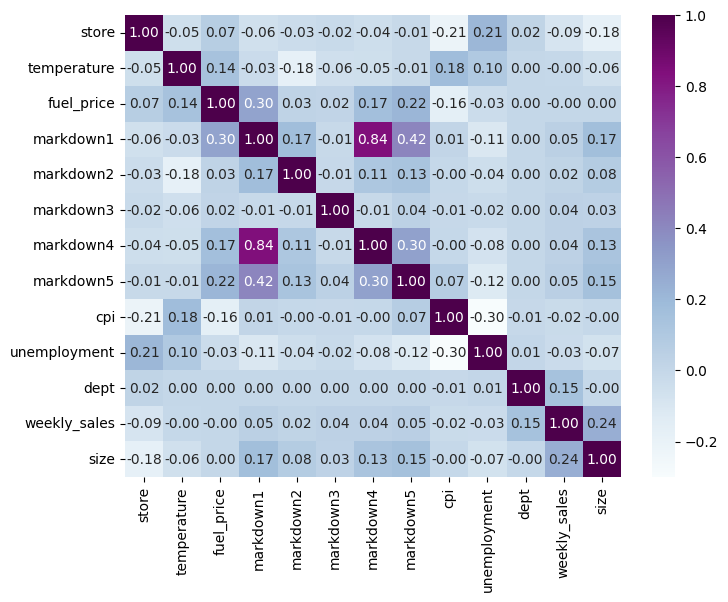

In [ ]:
# Numerical Data
corr_= df[numeric_columns].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu");

In [ ]:
pip install --upgrade matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 38.8 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


I generated count plots to analyze the distribution of the specified categorical features ('type', 'size', and 'store') in the DataFrame df using Seaborn and Matplotlib. These plots visualize the frequency of each category, aiding in the analysis of the dataset.

By analyzing the count plot for the 'type' feature, it becomes evident that category 'a' is the most prevalent, followed by category 'b', with category 'c' showing the lowest count. This observation offers valuable insights into the distribution of types across the dataset.

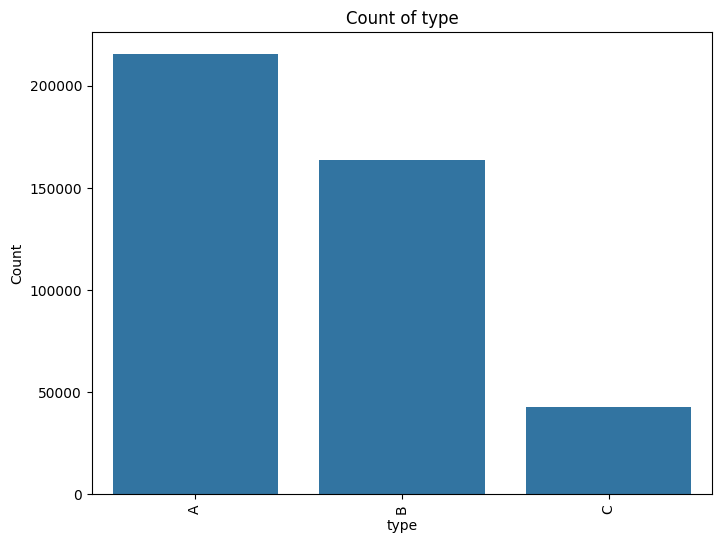

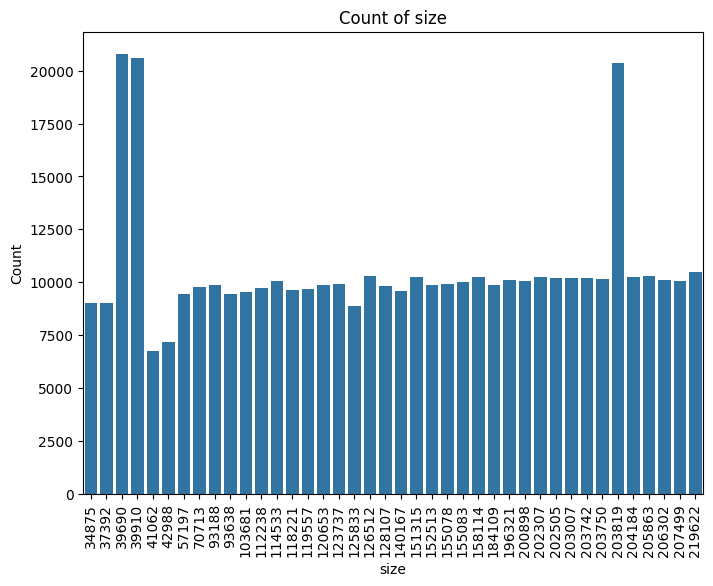

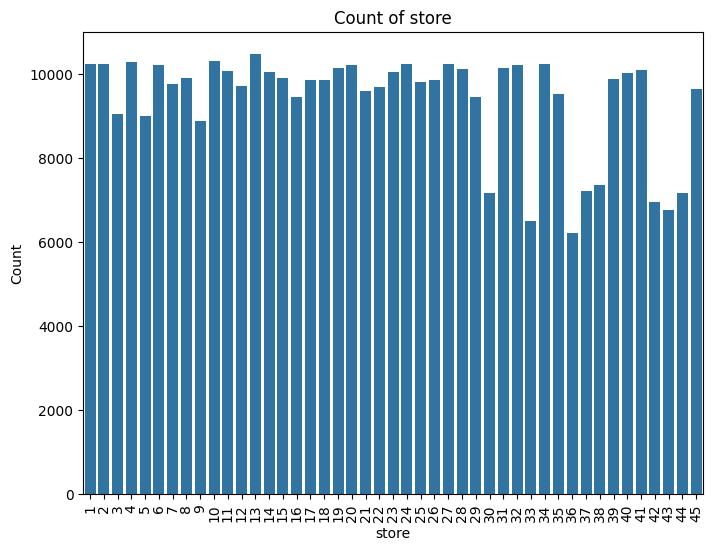

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the features for which you want bar plots
category_column = ['type','size','store']

# Loop through each feature and create a count plot
for feature in category_column:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=df)
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

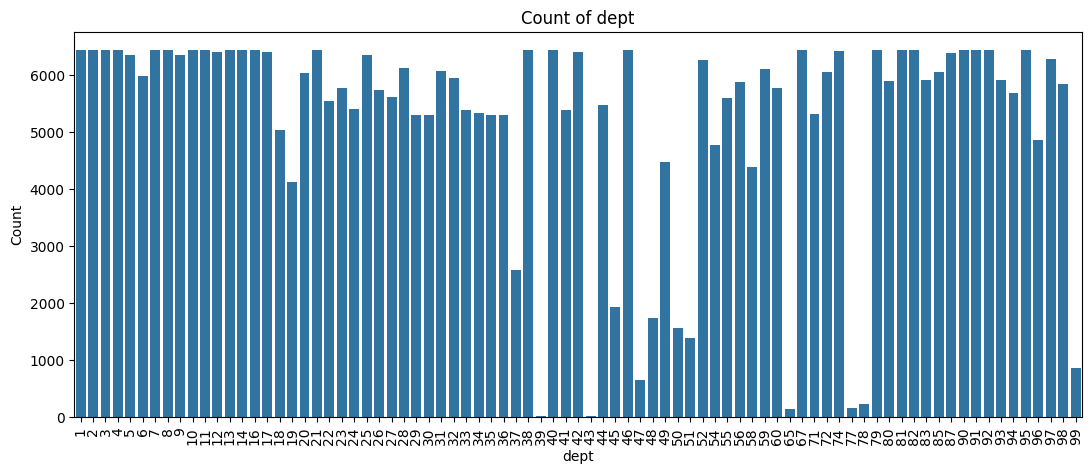

In [ ]:
# Specify the features for which you want bar plots
category_column = ['dept']

# Loop through each feature and create a count plot
for feature in category_column:
    plt.figure(figsize=(13, 5))
    sns.countplot(x=feature, data=df)
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
data = df[df['type']=='C']
data

,store,date,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,isholiday,dept,weekly_sales,type,size
286548,30,2010-02-05,39.05,2.572,0.00,0.00,0.00,0.0,0.00,210.752605,8.324,False,1,10158.77,C,42988
286549,30,2010-02-05,39.05,2.572,0.00,0.00,0.00,0.0,0.00,210.752605,8.324,False,2,12745.86,C,42988
286550,30,2010-02-05,39.05,2.572,0.00,0.00,0.00,0.0,0.00,210.752605,8.324,False,3,1052.98,C,42988
286551,30,2010-02-05,39.05,2.572,0.00,0.00,0.00,0.0,0.00,210.752605,8.324,False,4,14058.94,C,42988
286552,30,2010-02-05,39.05,2.572,0.00,0.00,0.00,0.0,0.00,210.752605,8.324,False,5,318.00,C,42988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411928,44,2012-10-26,46.97,3.755,38.65,2.61,0.98,0.0,457.74,131.193097,5.217,False,94,26641.59,C,39910
411929,44,2012-10-26,46.97,3.755,38.65,2.61,0.98,0.0,457.74,131.193097,5.217,False,95,32196.45,C,39910
411930,44,2012-10-26,46.97,3.755,38.65,2.61,0.98,0.0,457.74,131.193097,5.217,False,96,2983.19,C,39910
411931,44,2012-10-26,46.97,3.755,38.65,2.61,0.98,0.0,457.74,131.193097,5.217,False,97,7054.80,C,39910


In [ ]:
data.shape

(42597, 16)

In [ ]:
data.store.value_counts()

store
38    7362
37    7206
44    7169
30    7156
42    6953
43    6751
Name: count, dtype: int64

In [ ]:
data.dept.value_counts()

dept
1     858
92    858
91    858
38    858
40    858
     ... 
99     21
29     16
71     16
19      1
35      1
Name: count, Length: 66, dtype: int64

In [ ]:
data.dept.value_counts()

dept
1     858
92    858
91    858
38    858
40    858
     ... 
99     21
29     16
71     16
19      1
35      1
Name: count, Length: 66, dtype: int64

In [ ]:
# Get the value counts for the 'dept' column
dept_counts = df['dept'].value_counts().reset_index()
dept_counts.columns = ['dept', 'count']

# Create a bar plot using Plotly Express
fig = px.bar(dept_counts, x='dept', y='count', title='Count of dept', labels={'dept': 'Department', 'count': 'Count'})
fig.update_xaxes(tickangle=90)
fig.show()

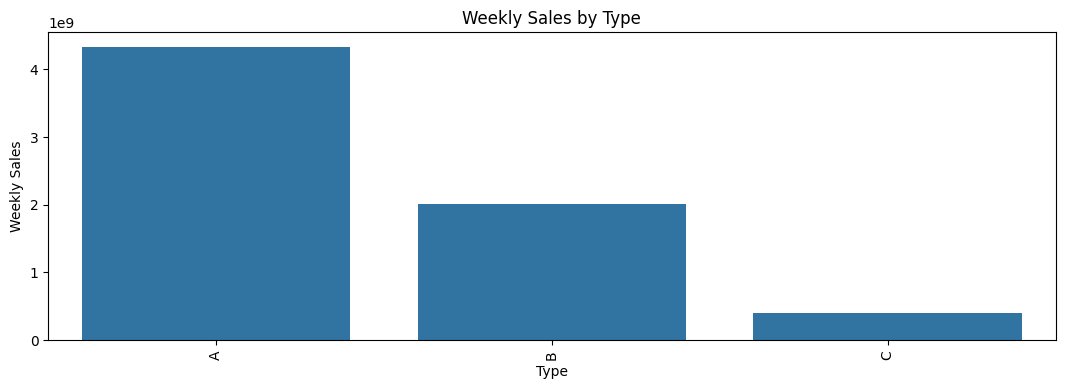

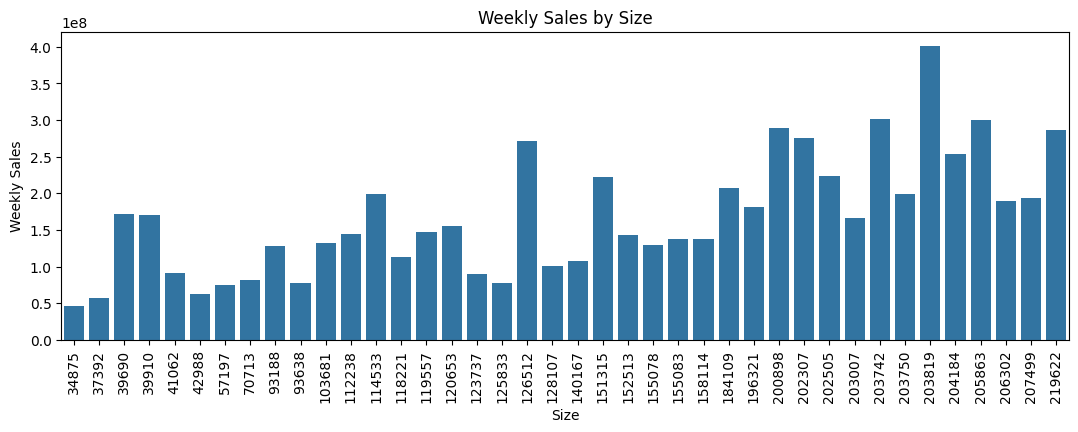

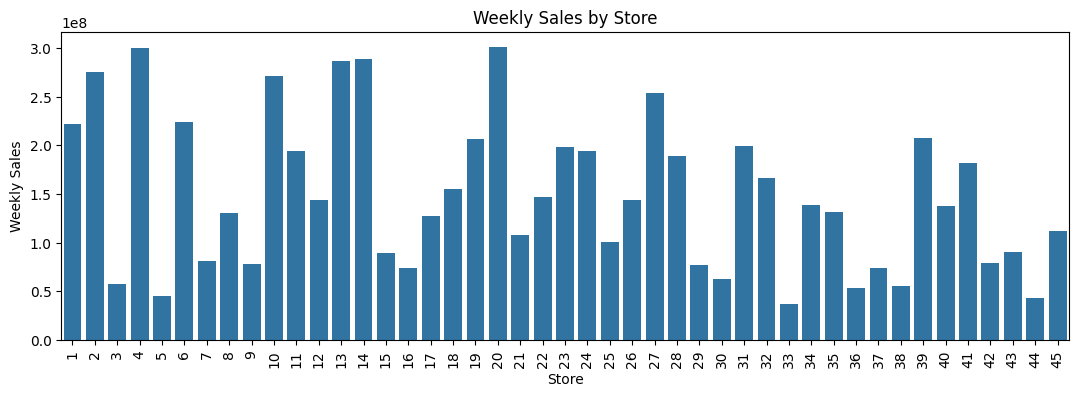

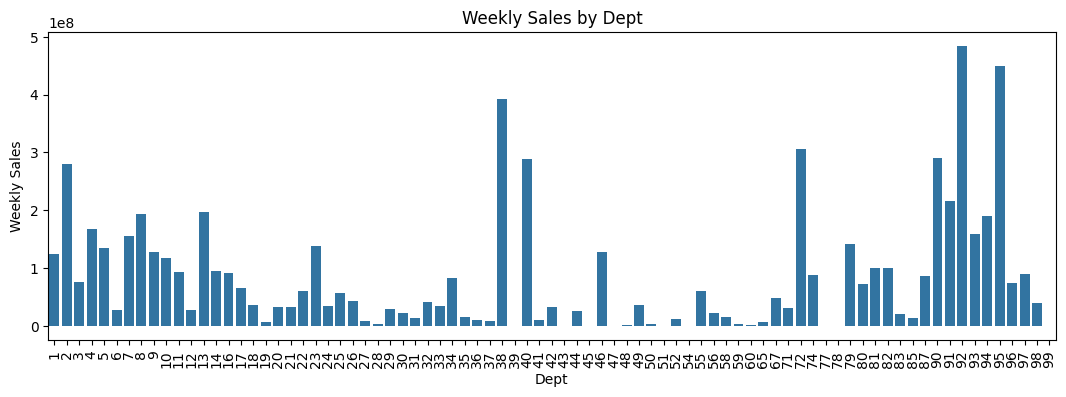

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Specify the features for which you want bar plots
category_columns = ['type', 'size', 'store','dept']

# Loop through each feature and create a bar plot with 'weekly sales' as y-label
for feature in category_columns:
    plt.figure(figsize=(13, 4))

    # Aggregate the weekly sales by the feature
    agg_df = df.groupby(feature)['weekly_sales'].sum().reset_index()

    sns.barplot(x=feature, y='weekly_sales', data=agg_df)
    plt.title(f'Weekly Sales by {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Weekly Sales')
    plt.xticks(rotation=90)
    plt.show()


In [ ]:
df.type.unique()

array(['A', 'B', 'C'], dtype=object)

Type C has the lowest weekly sales

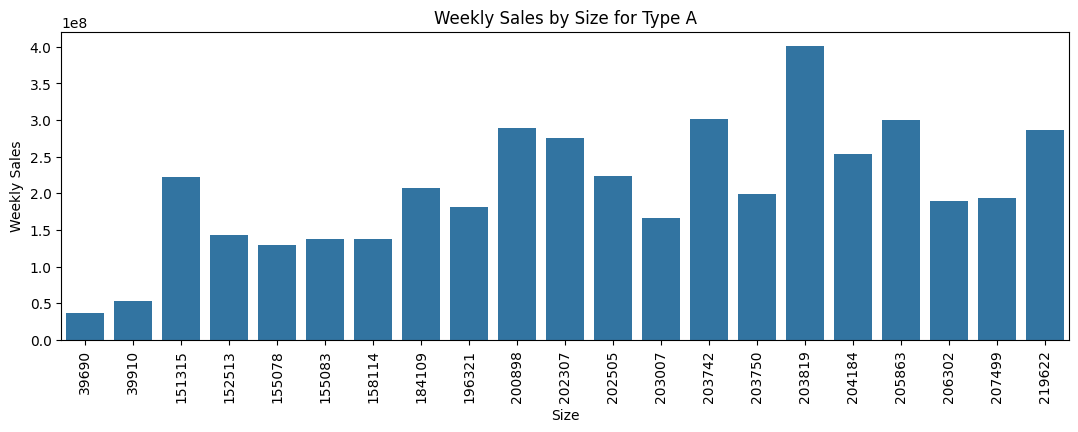

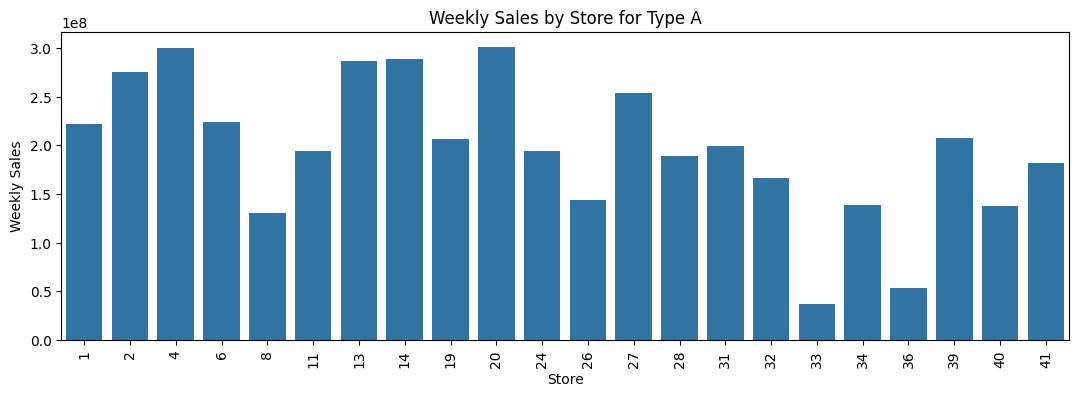

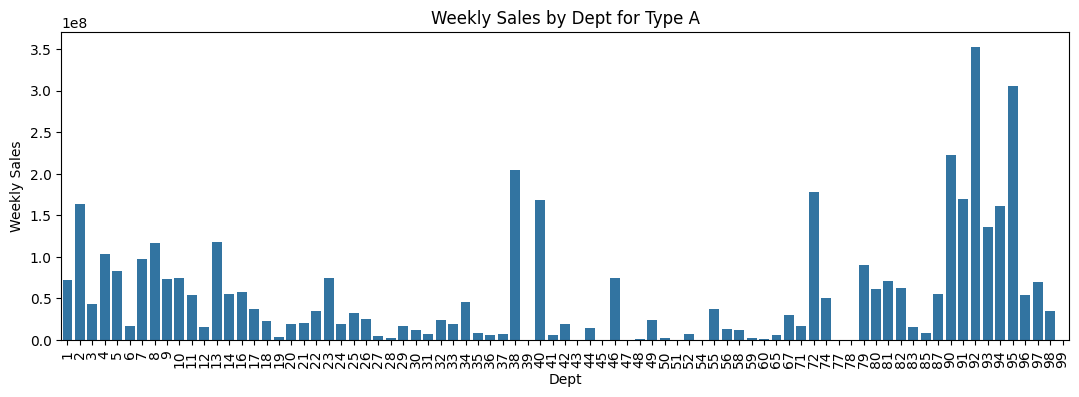

In [ ]:
# Assuming df is your DataFrame and it contains a column named 'type'
# Filter the DataFrame to only include rows where 'type' is 'A'
df_type_a = df[df['type'] == 'A']

# Specify the features for which you want bar plots
category_columns = ['size', 'store', 'dept']

# Loop through each feature and create a bar plot with 'weekly_sales' as y-label
for feature in category_columns:
    plt.figure(figsize=(13, 4))

    # Aggregate the weekly sales by the feature
    agg_df = df_type_a.groupby(feature)['weekly_sales'].sum().reset_index()

    sns.barplot(x=feature, y='weekly_sales', data=agg_df)
    plt.title(f'Weekly Sales by {feature.capitalize()} for Type A')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Weekly Sales')
    plt.xticks(rotation=90)
    plt.show()

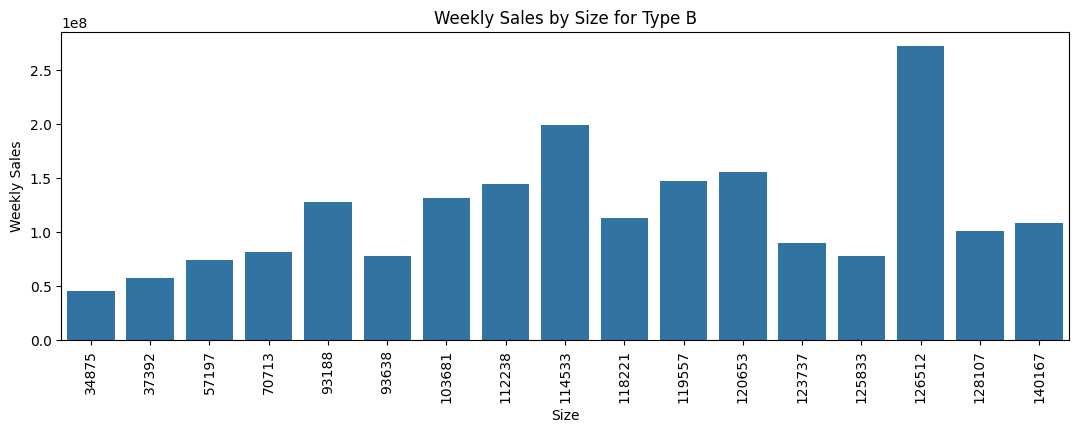

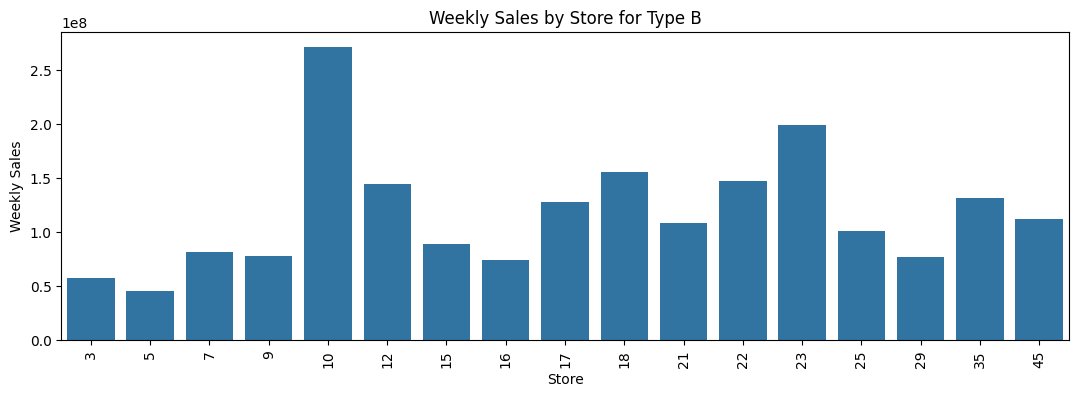

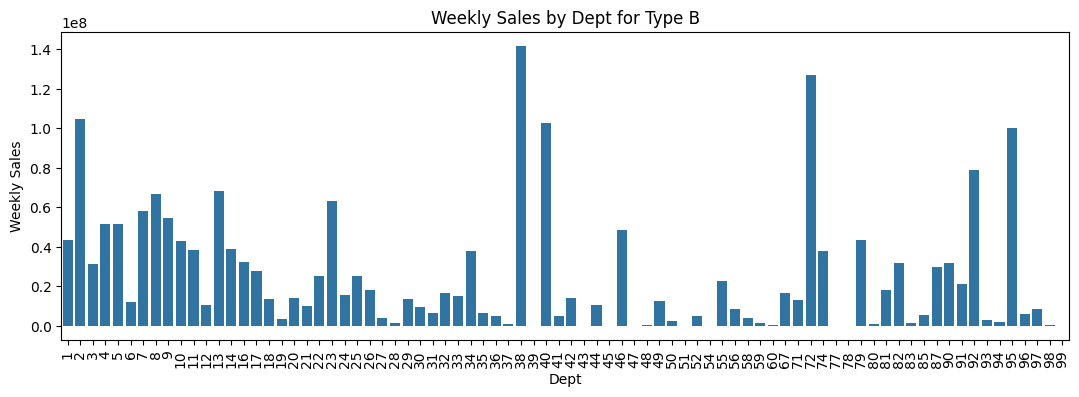

In [ ]:
# Assuming df is your DataFrame and it contains a column named 'type'
# Filter the DataFrame to only include rows where 'type' is 'B'
df_type_b = df[df['type'] == 'B']

# Specify the features for which you want bar plots
category_columns = ['size', 'store', 'dept']

# Loop through each feature and create a bar plot with 'weekly_sales' as y-label
for feature in category_columns:
    plt.figure(figsize=(13, 4))

    # Aggregate the weekly sales by the feature
    agg_df = df_type_b.groupby(feature)['weekly_sales'].sum().reset_index()

    sns.barplot(x=feature, y='weekly_sales', data=agg_df)
    plt.title(f'Weekly Sales by {feature.capitalize()} for Type B')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Weekly Sales')
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
df[df['dept']==93]['weekly_sales'].sum()

159698663.19

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame and it contains columns named 'type', 'store', 'dept', and 'weekly_sales'
# Filter the DataFrame to only include rows where 'type' is 'A'
df_type_a = df[df['type'] == 'A']

# Aggregate the weekly sales by 'store' and 'dept'
agg_df = df_type_a.groupby(['store', 'dept'])['weekly_sales'].sum().reset_index()

# Find the maximum sum of weekly sales for all stores
max_weekly_sales = agg_df.groupby('store')['weekly_sales'].sum().max()

# Filter stores where the sum of weekly sales exceeds the threshold
stores_above_threshold = agg_df.groupby('store')['weekly_sales'].sum()[agg_df.groupby('store')['weekly_sales'].sum() > 2.0e+06].index.values

# Filter the aggregated DataFrame to only include stores above the threshold
agg_df_filtered = agg_df[agg_df['store'].isin(stores_above_threshold)]

# Get unique stores
stores = agg_df_filtered['store'].unique()

# Loop through each store and create a bar plot for its departments
for store in stores:
    plt.figure(figsize=(13, 4))

    # Filter data for the current store
    store_data = agg_df_filtered[agg_df_filtered['store'] == store]

    sns.barplot


<ipython-input-53-f52cd248a297>:26: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



<Figure size 1300x400 with 0 Axes>

<Figure size 1300x400 with 0 Axes>

<Figure size 1300x400 with 0 Axes>

<Figure size 1300x400 with 0 Axes>

<Figure size 1300x400 with 0 Axes>

<Figure size 1300x400 with 0 Axes>

<Figure size 1300x400 with 0 Axes>

<Figure size 1300x400 with 0 Axes>

<Figure size 1300x400 with 0 Axes>

<Figure size 1300x400 with 0 Axes>

<Figure size 1300x400 with 0 Axes>

<Figure size 1300x400 with 0 Axes>

<Figure size 1300x400 with 0 Axes>

<Figure size 1300x400 with 0 Axes>

<Figure size 1300x400 with 0 Axes>

<Figure size 1300x400 with 0 Axes>

<Figure size 1300x400 with 0 Axes>

<Figure size 1300x400 with 0 Axes>

<Figure size 1300x400 with 0 Axes>

<Figure size 1300x400 with 0 Axes>

<Figure size 1300x400 with 0 Axes>

<Figure size 1300x400 with 0 Axes>

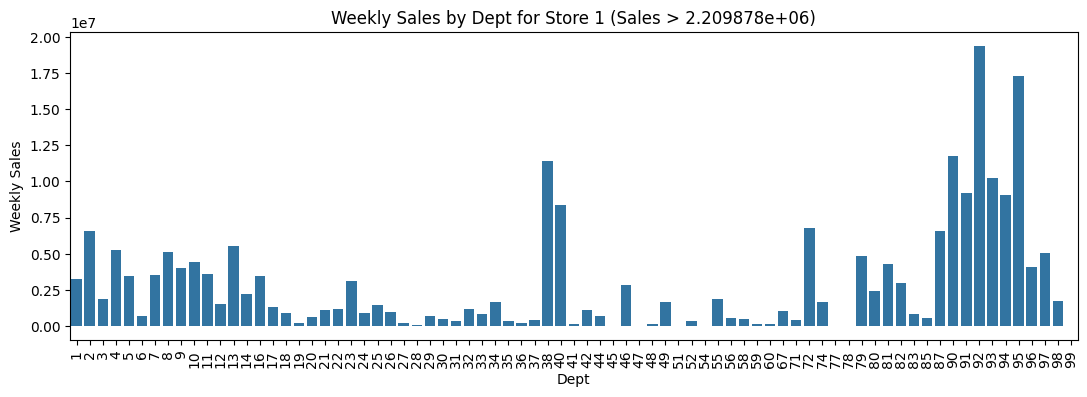

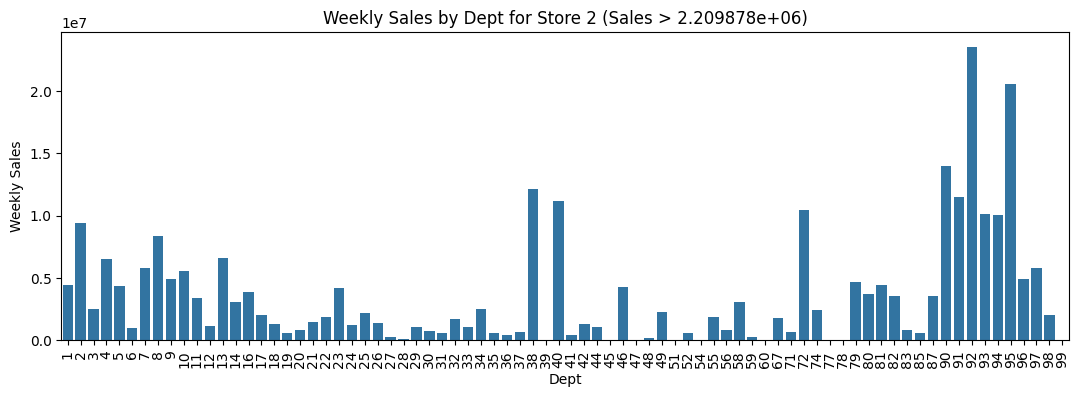

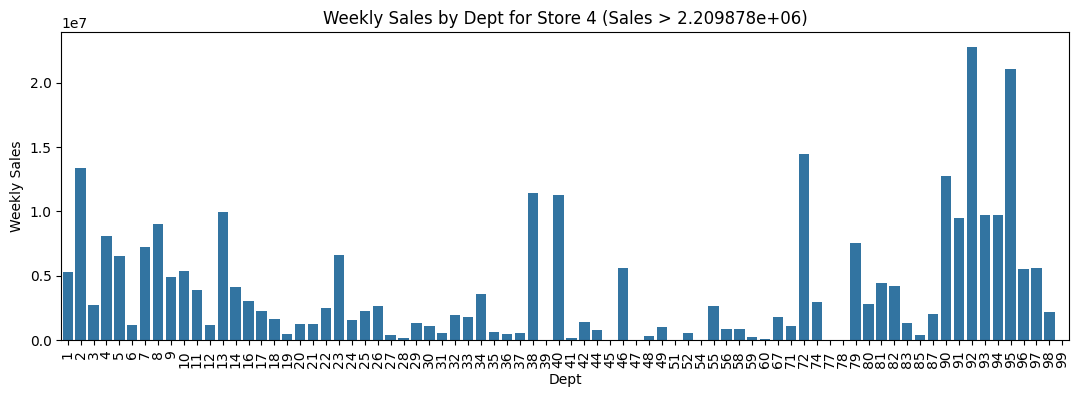

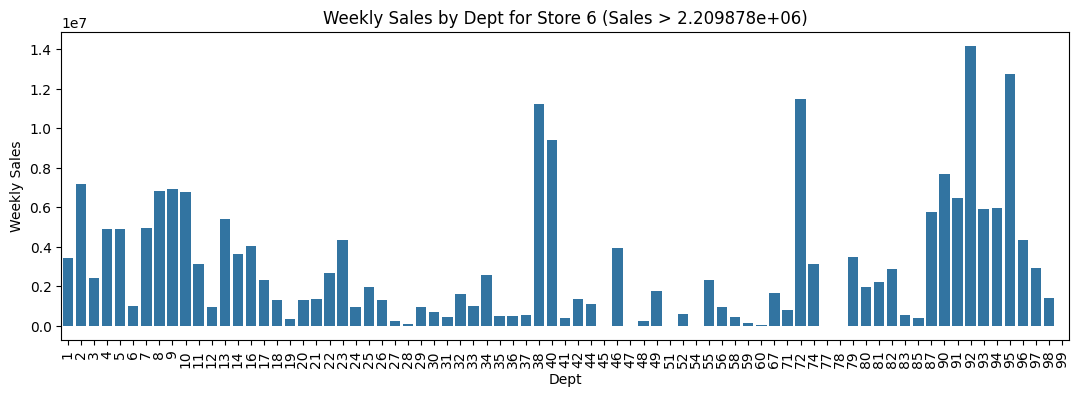

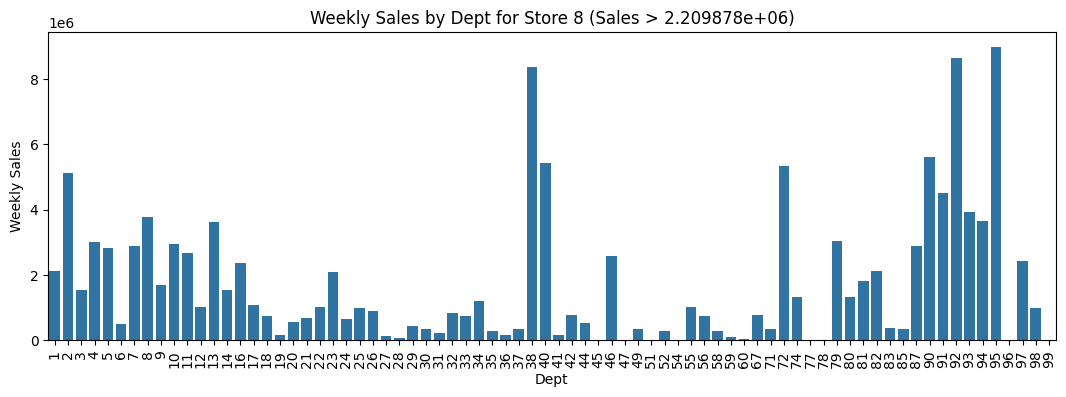

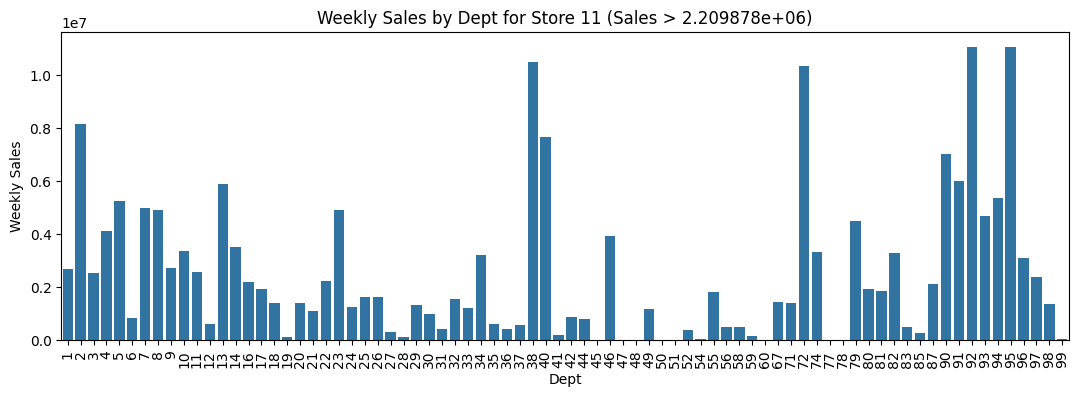

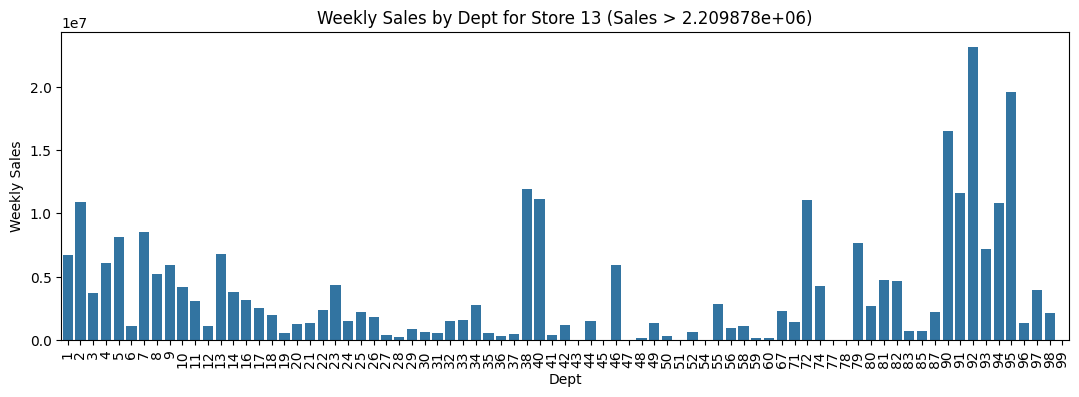

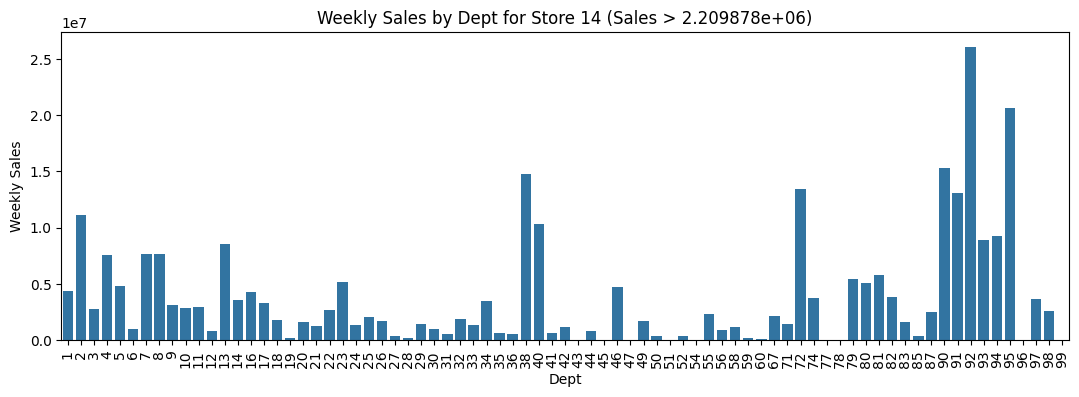

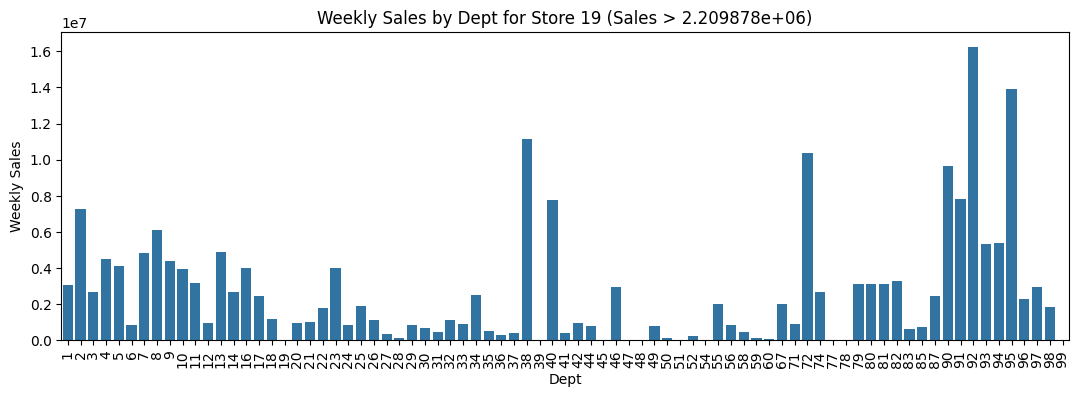

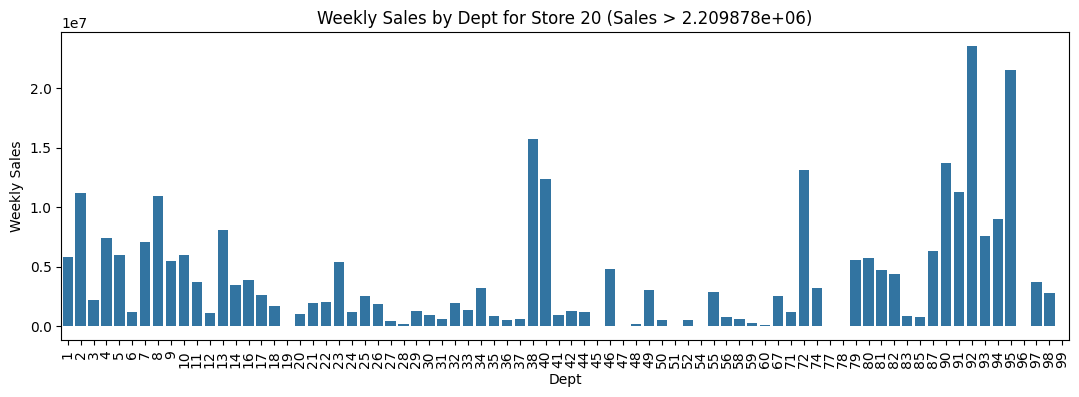

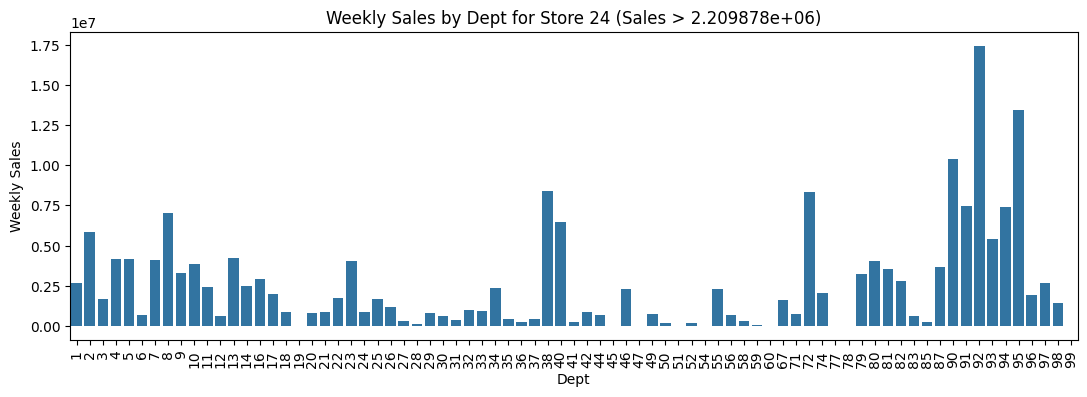

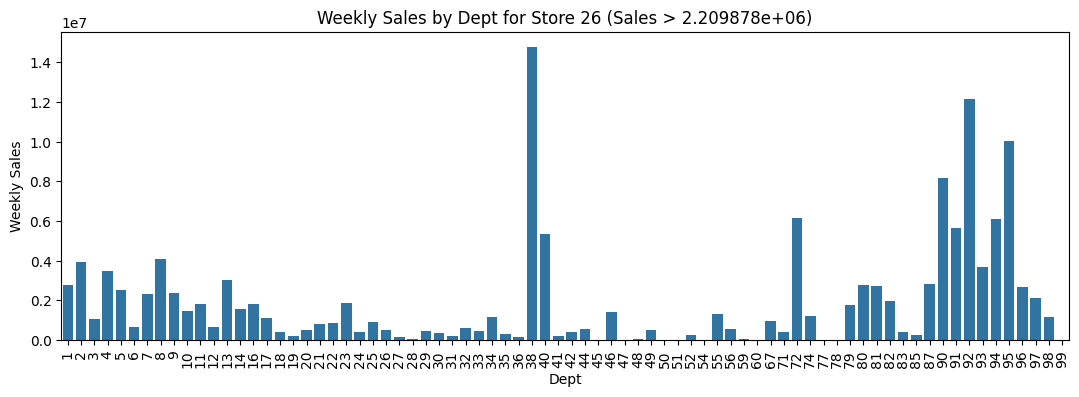

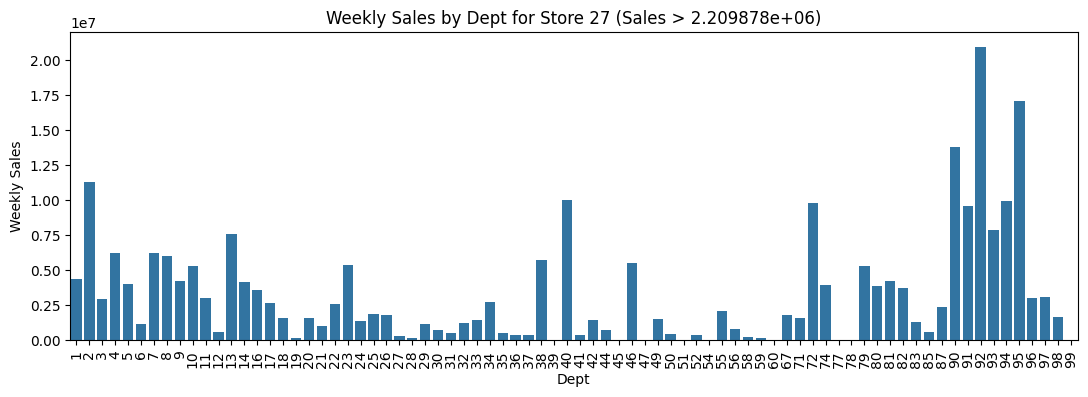

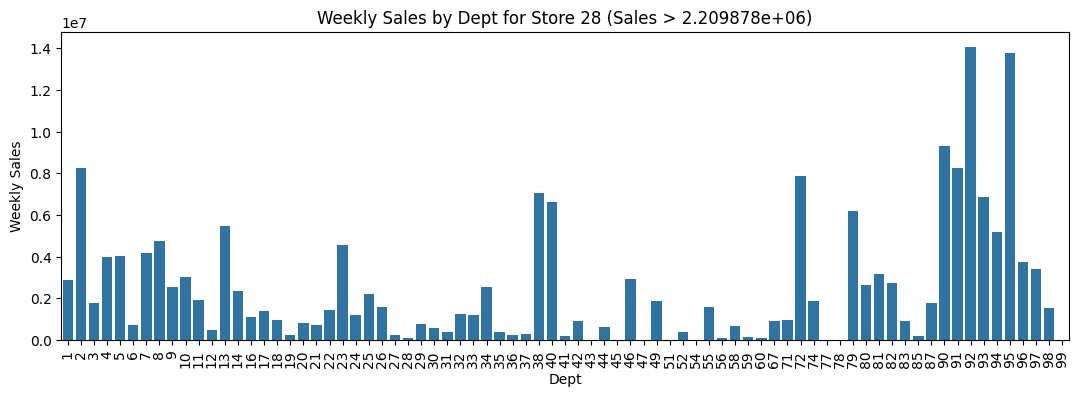

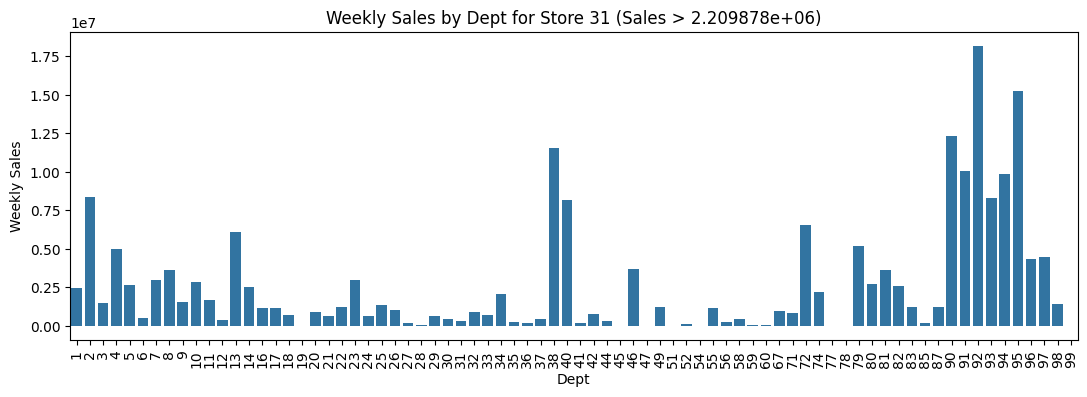

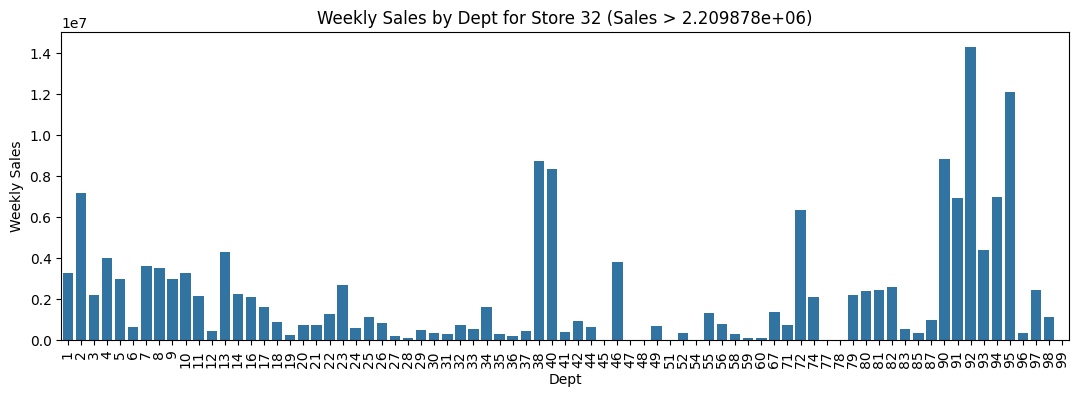

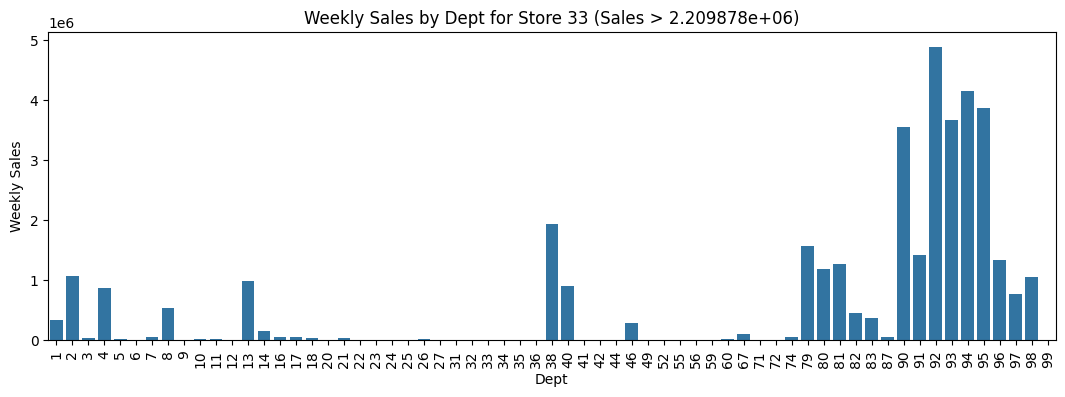

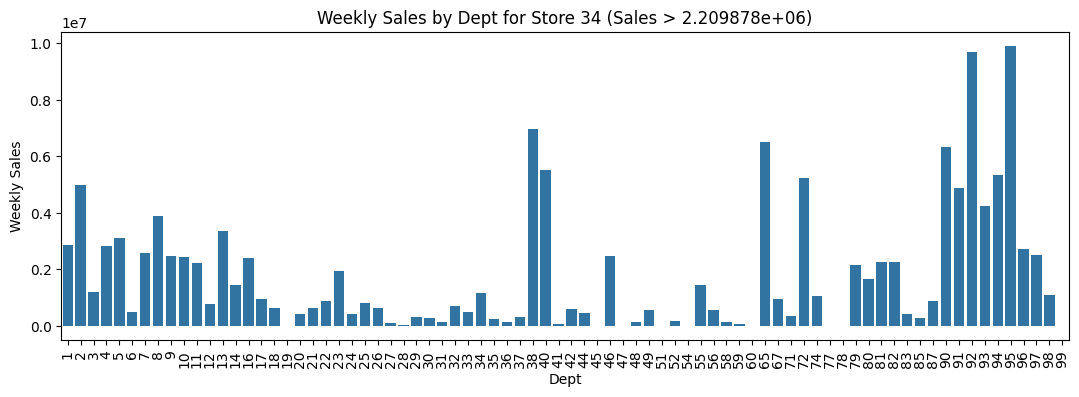

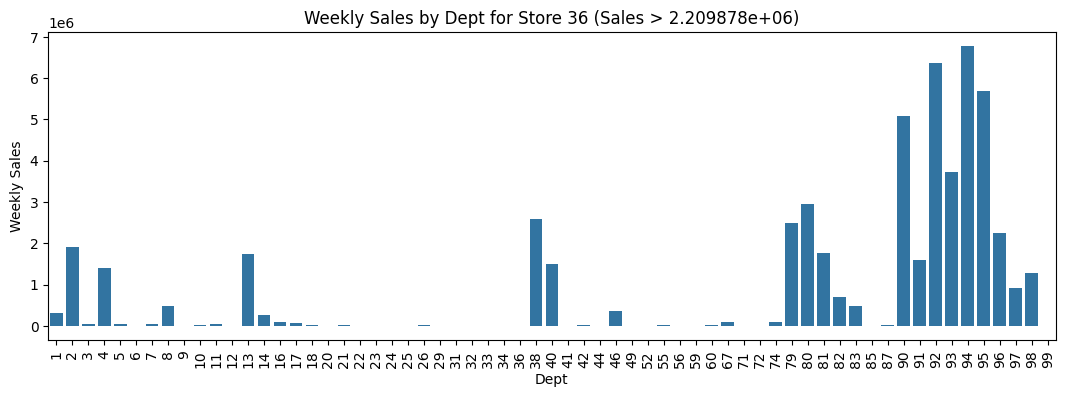

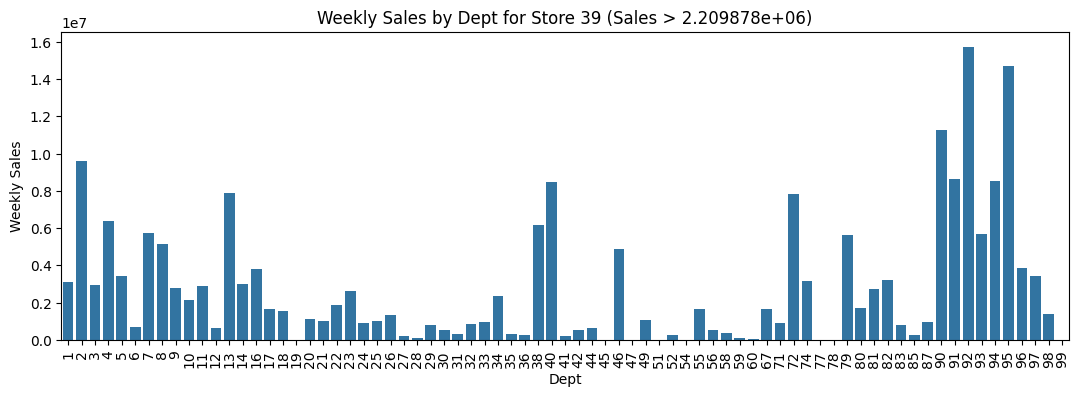

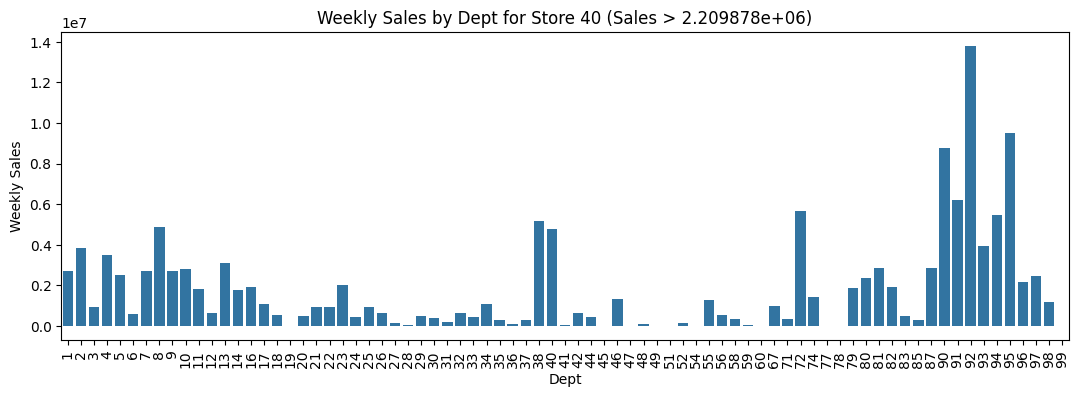

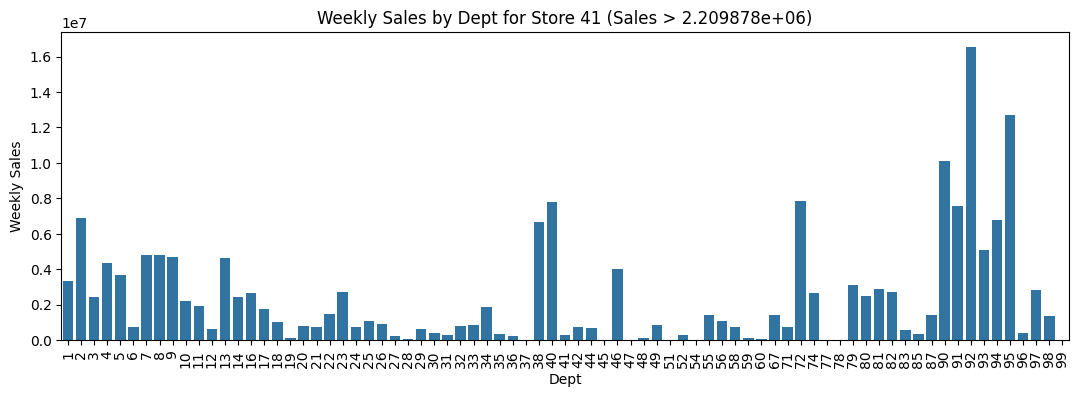

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame and it contains columns named 'type', 'store', 'dept', and 'weekly_sales'
# Filter the DataFrame to only include rows where 'type' is 'A'
df_type_a = df[df['type'] == 'A']

# Aggregate the weekly sales by 'store' and find the maximum weekly sales for each store
max_weekly_sales = df_type_a.groupby('store')['weekly_sales'].sum()

# Filter stores where the maximum weekly sales exceed the threshold
stores_above_threshold = max_weekly_sales[max_weekly_sales > 5.209878e+06].index

# Filter the DataFrame to only include stores above the threshold
df_above_threshold = df_type_a[df_type_a['store'].isin(stores_above_threshold)]

# Aggregate the weekly sales by 'store' and 'dept' for stores above the threshold
agg_df_filtered = df_above_threshold.groupby(['store', 'dept'])['weekly_sales'].sum().reset_index()

# Get unique stores
stores = agg_df_filtered['store'].unique()

# Loop through each store and create a bar plot for its departments
for store in stores:
    plt.figure(figsize=(13, 4))

    # Filter data for the current store
    store_data = agg_df_filtered[agg_df_filtered['store'] == store]

    sns.barplot(x='dept', y='weekly_sales', data=store_data)
    plt.title(f'Weekly Sales by Dept for Store {store} (Sales > 2.209878e+06)')
    plt.xlabel('Dept')
    plt.ylabel('Weekly Sales')
    plt.xticks(rotation=90)
    plt.show()

    # Close the figure after showing
    plt.close()


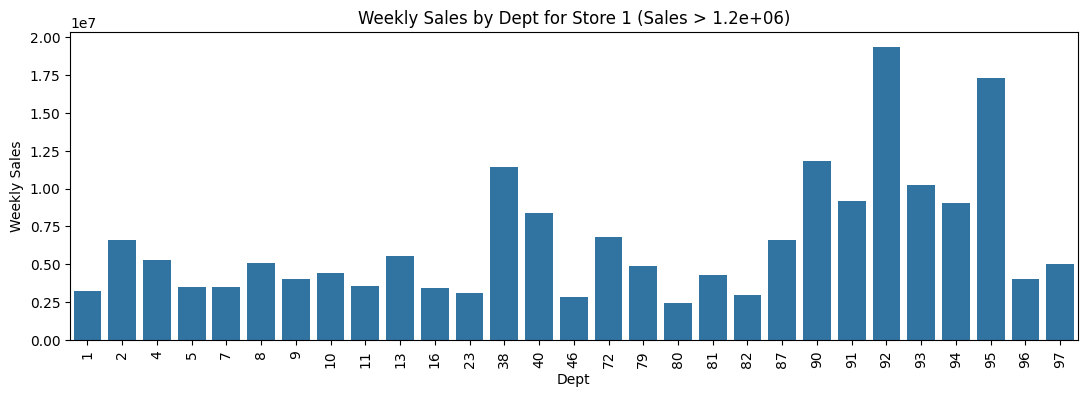

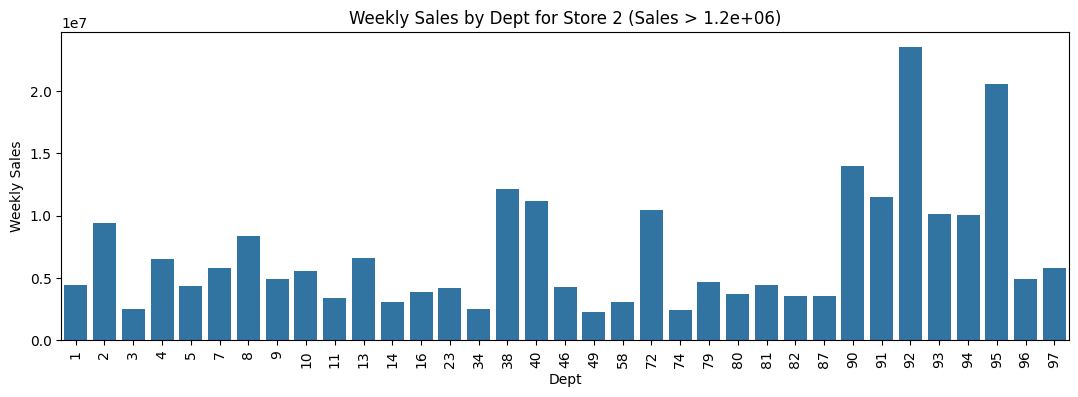

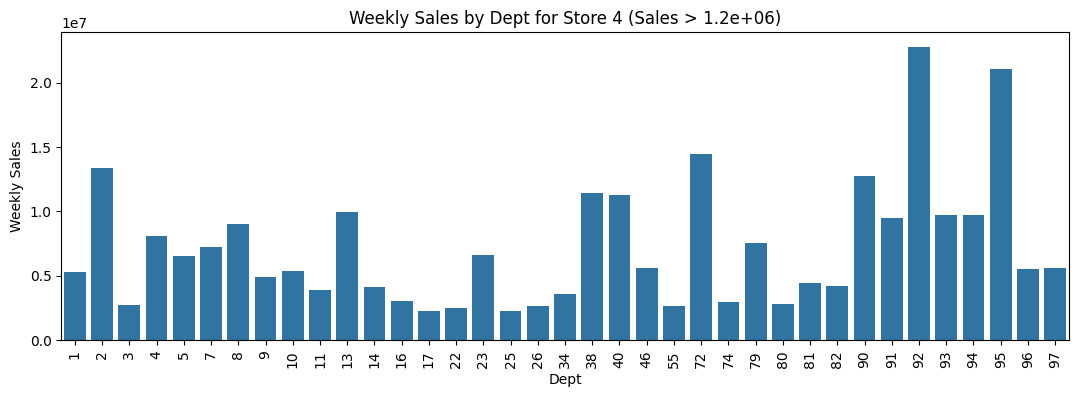

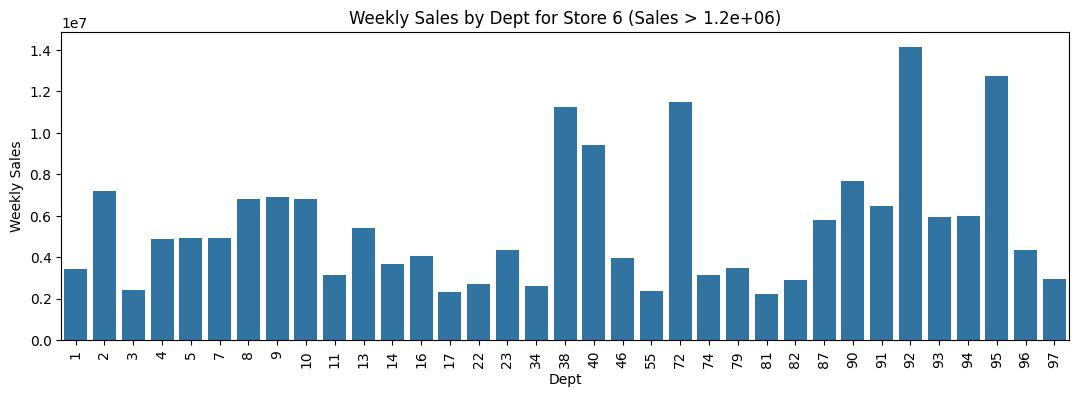

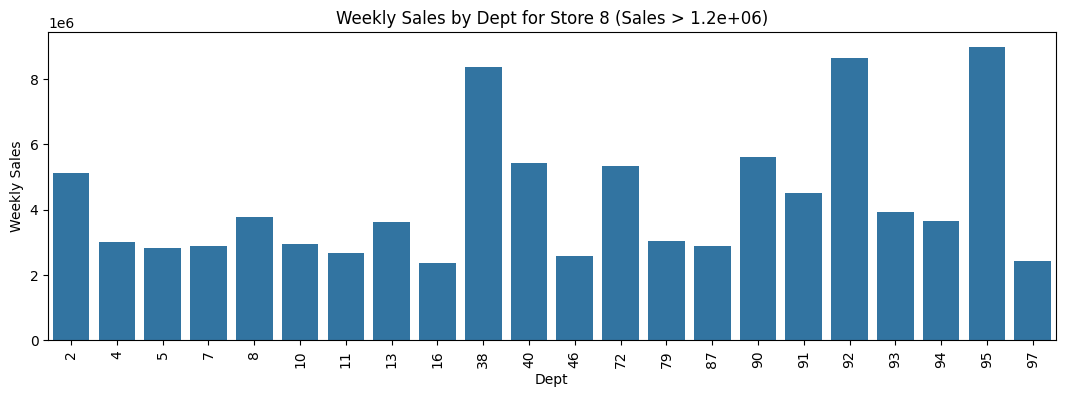

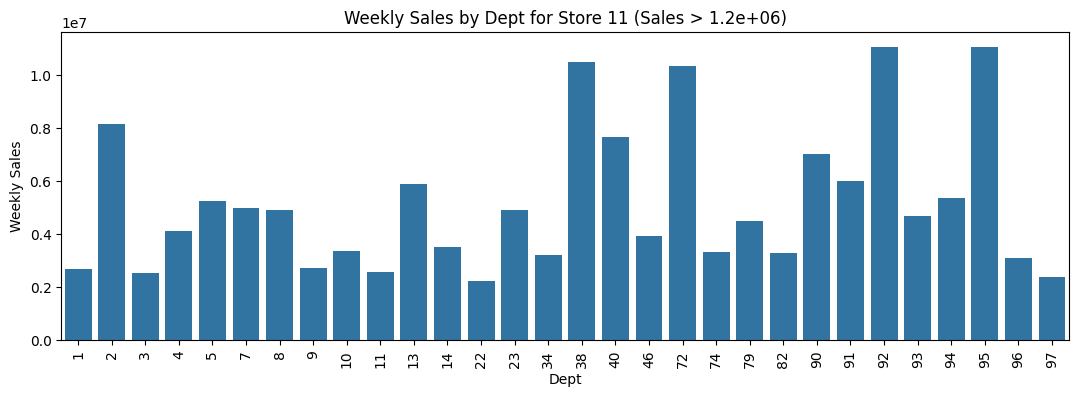

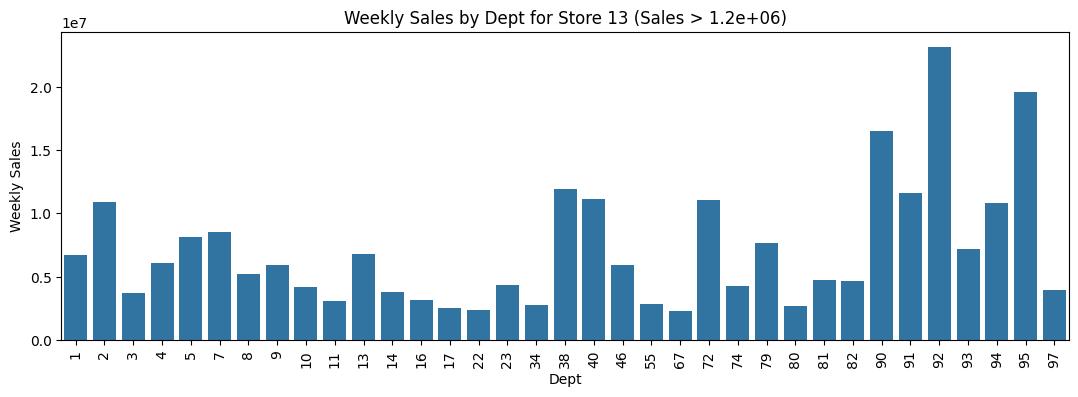

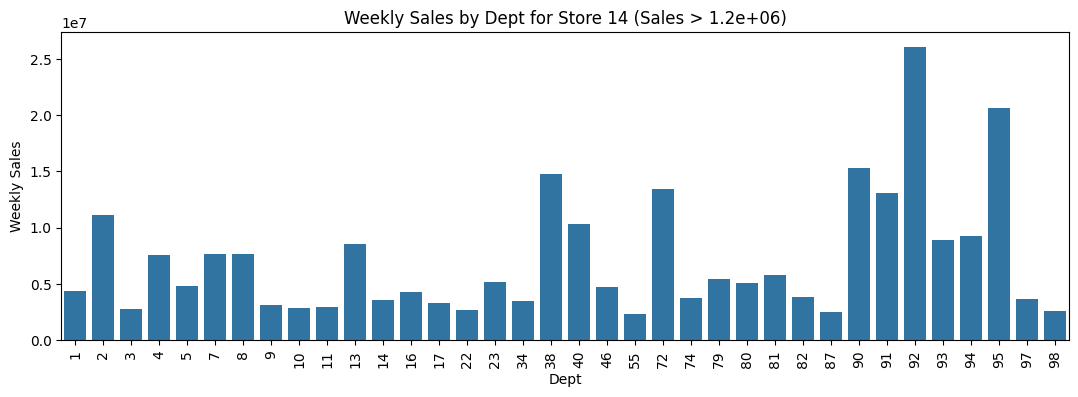

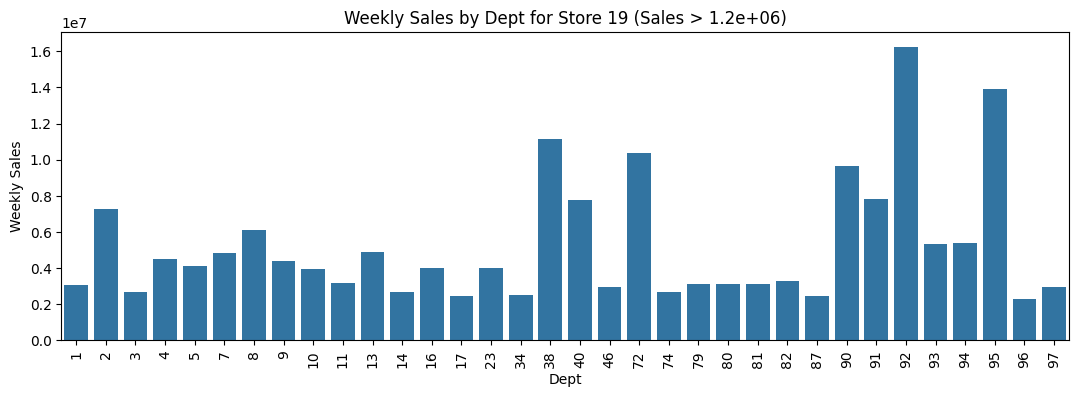

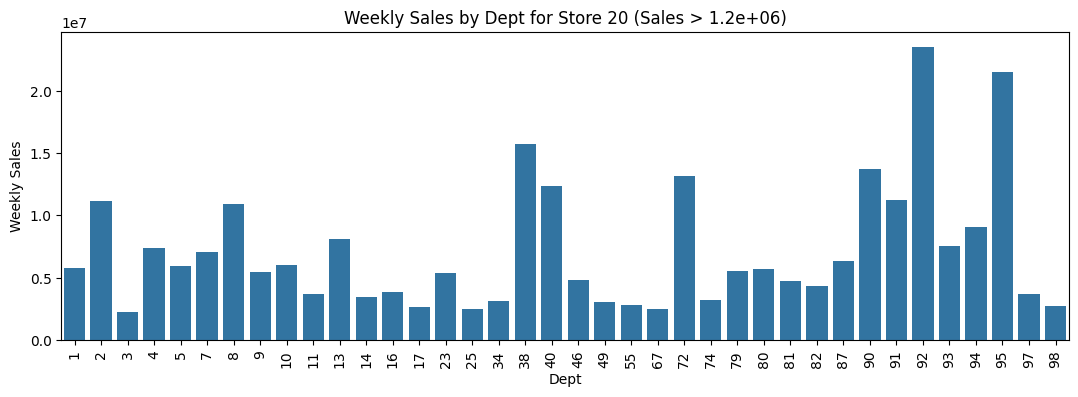

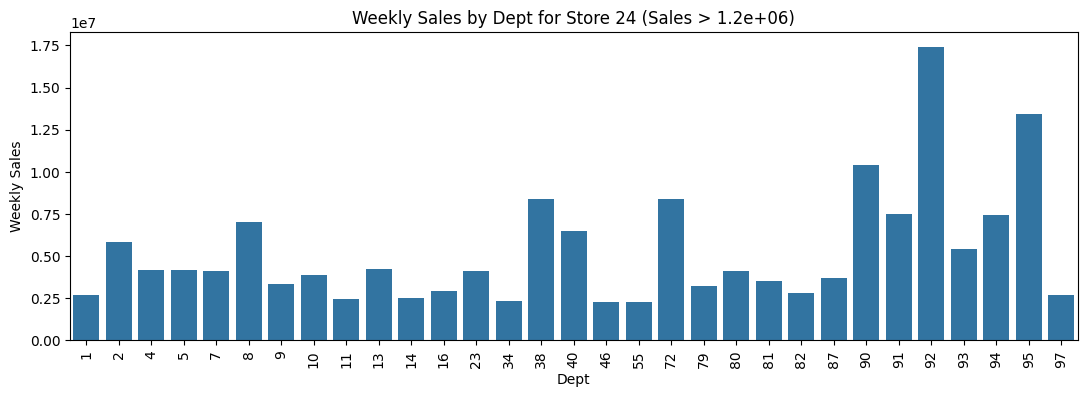

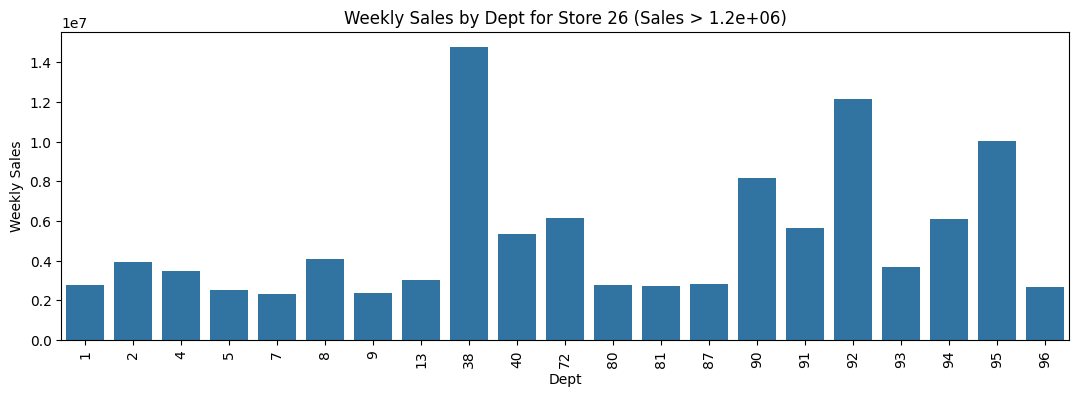

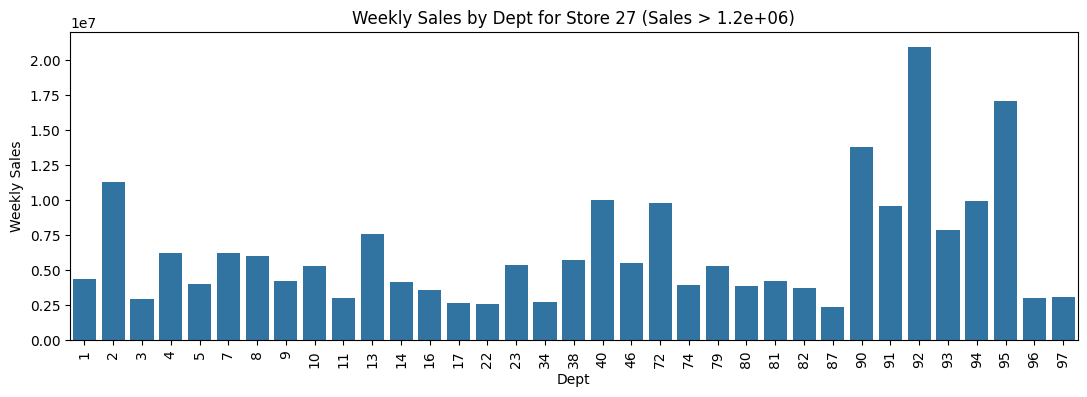

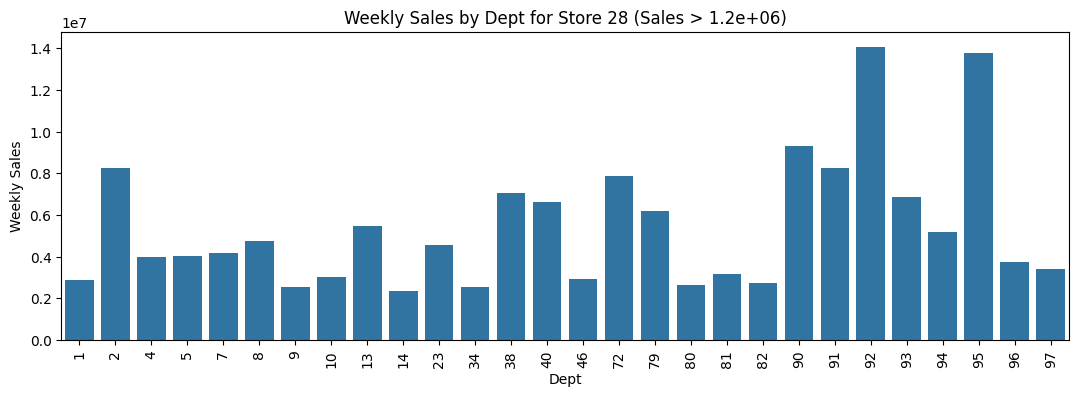

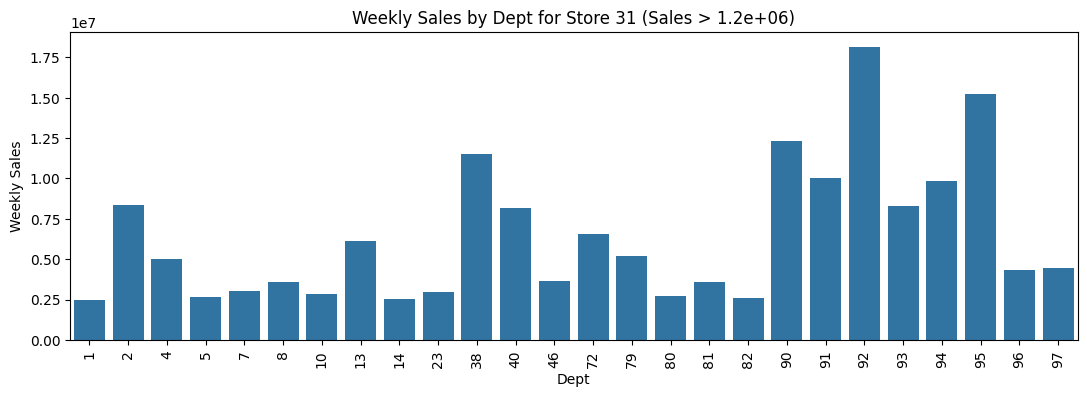

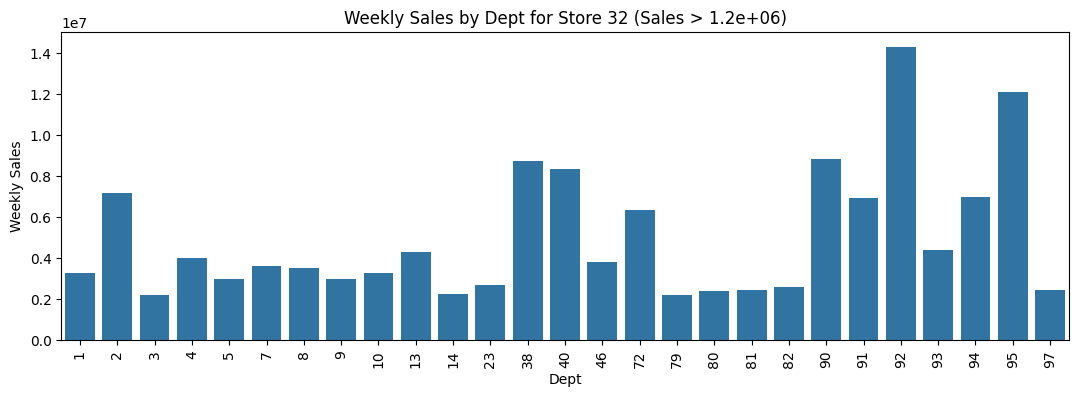

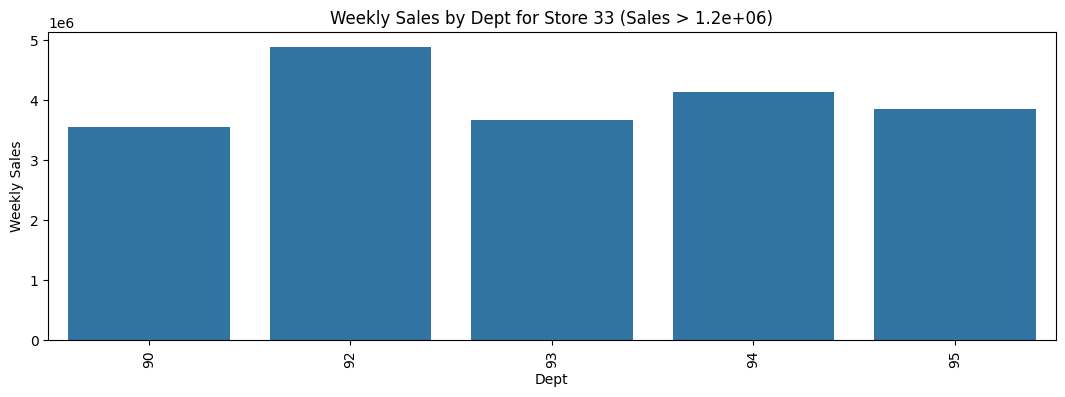

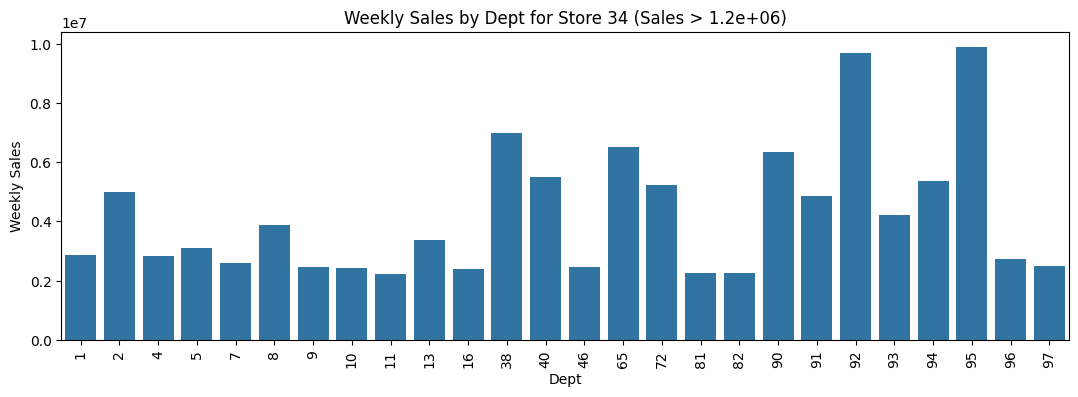

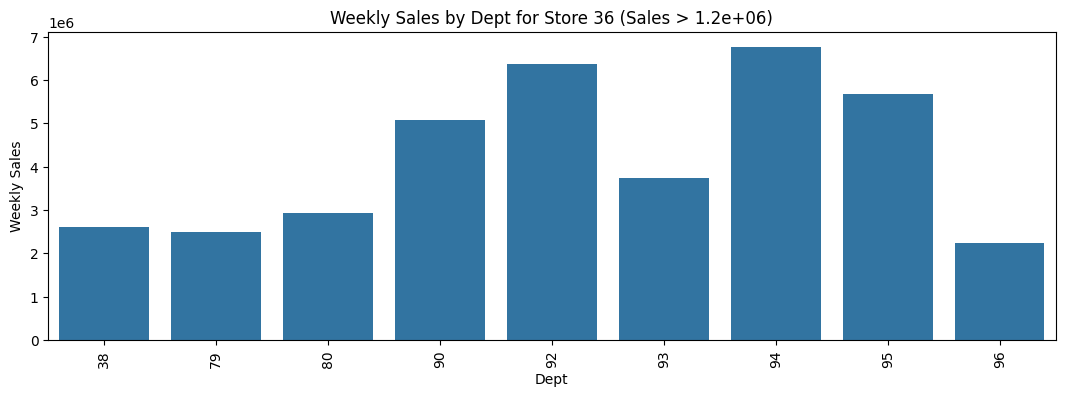

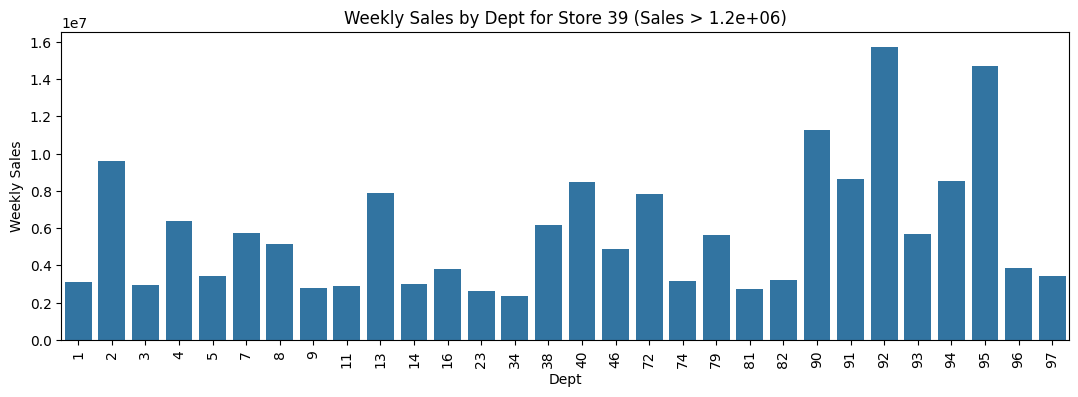

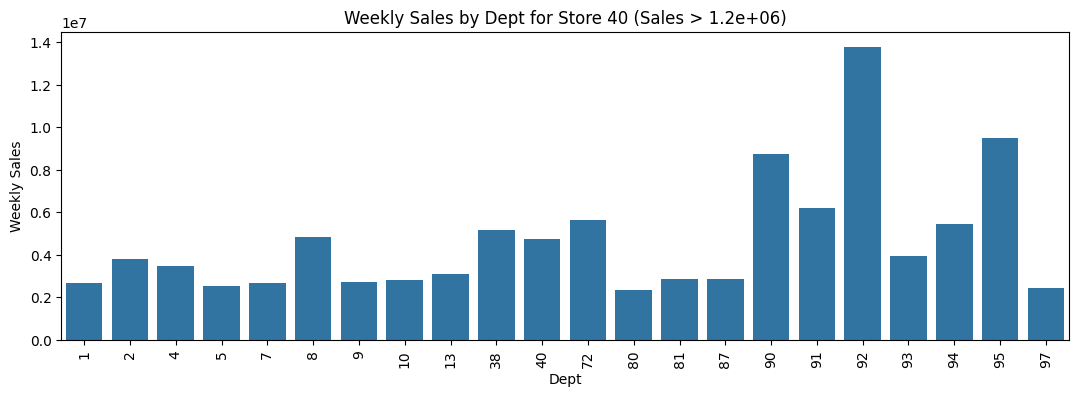

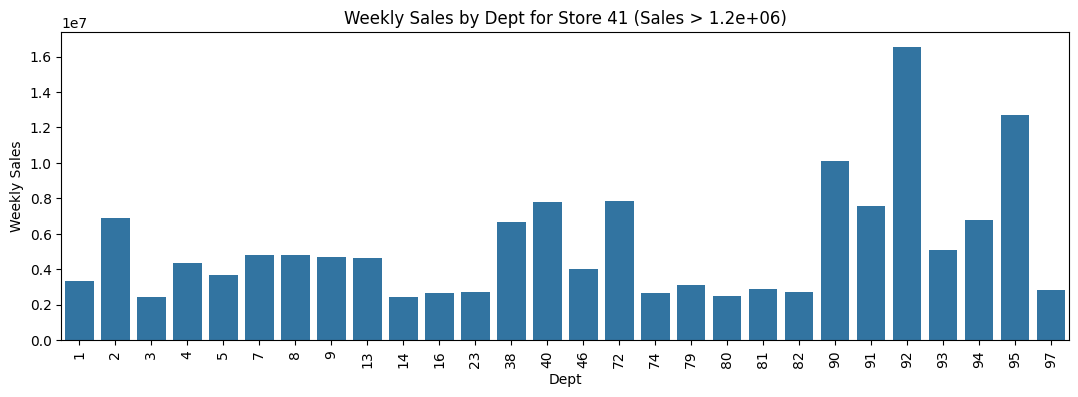

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame and it contains columns named 'type', 'store', 'dept', and 'weekly_sales'
# Filter the DataFrame to only include rows where 'type' is 'A'
df_type_a = df[df['type'] == 'A']

# Aggregate the weekly sales by 'store' and 'dept', and filter for departments with sales greater than 2500 for each store
agg_df = df_type_a.groupby(['store', 'dept'])['weekly_sales'].sum().reset_index()
agg_df_filtered = agg_df[agg_df['weekly_sales'] > 2.209878e+06]

# Get unique stores
stores = agg_df_filtered['store'].unique()

# Loop through each store and create a bar plot for its departments
for store in stores:
    plt.figure(figsize=(13, 4))

    # Filter data for the current store
    store_data = agg_df_filtered[agg_df_filtered['store'] == store]

    sns.barplot(x='dept', y='weekly_sales', data=store_data)
    plt.title(f'Weekly Sales by Dept for Store {store} (Sales > 1.2e+06)')
    plt.xlabel('Dept')
    plt.ylabel('Weekly Sales')
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
agg_df.describe()

,store,dept,weekly_sales
count,1671.000000,1671.000000,1.671000e+03
mean,21.966487,45.884500,2.591870e+06
std,12.775072,29.982337,3.538168e+06
min,1.000000,1.000000,-2.562000e+03
25%,11.000000,21.000000,3.276960e+05
50%,24.000000,41.000000,1.209878e+06
75%,33.000000,74.000000,3.422059e+06
max,41.000000,99.000000,2.610150e+07


In [ ]:
df_type_a.store.unique(),df_type_a.dept.unique()

(array([ 1,  2,  4,  6,  8, 11, 13, 14, 19, 20, 24, 26, 27, 28, 31, 32, 33,
        34, 36, 39, 40, 41]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56,
        58, 59, 60, 67, 71, 72, 74, 79, 80, 81, 82, 83, 85, 87, 90, 91, 92,
        93, 94, 95, 97, 98, 78, 96, 99, 77, 39, 50, 43, 65]))

In [ ]:
df_type_b.store.unique()

SyntaxError: invalid syntax (<ipython-input-58-21413dc76abc>, line 1)

In [ ]:
df_type_c.store.unique()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame and it contains columns named 'type', 'store', 'dept', and 'weekly_sales'
# Filter the DataFrame to only include rows where 'type' is 'A'
df_type_a = df[df['type'] == 'A']

# Aggregate the weekly sales by 'store' and 'dept', and filter for departments with sales greater than 2500 for each store
agg_df = df_type_a.groupby(['store', 'dept'])['weekly_sales'].sum().reset_index()
agg_df_filtered = agg_df[agg_df['weekly_sales'] > 2500]

# Count the number of unique stores
stores = agg_df_filtered['store'].unique()
num_stores = len(stores)
print("Number of stores:", num_stores)

# Create subplots for each store
fig, axes = plt.subplots(nrows=1, ncols=num_stores, figsize=(5*num_stores, 5), sharey=True)

# Iterate over each store to create a bar plot
for i, store in enumerate(stores):
    ax = axes[i]
    data = agg_df_filtered[agg_df_filtered['store'] == store]
    sns.barplot(x='dept', y='weekly_sales', data=data, ax=ax)
    ax.set_title(f'Store {store}')
    ax.set_xlabel('Dept')
    ax.set_ylabel('Weekly Sales')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

In [ ]:
df.markdown1.max(),df.markdown1.min()

In [ ]:
df.markdown2.max(),df.markdown2.min()

In [ ]:
import seaborn as sns
def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,2,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

In [ ]:
continuous_columns = ['temperature','fuel_price','markdown1', 'markdown2','markdown3','markdown4','markdown5','cpi',
                      'weekly_sales','size']
for i in continuous_columns:
    plot(df, i)

In [ ]:
df1 = df.copy()


In [ ]:
# Using IQR and clip() methods to handle the outliers and add a new column of dataframe

def outlier(df1, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

In [ ]:
# (Ex: lower threshold = 5 and upper threshold = 20)
# above upper threshold values (>20) are converted to upper threshold value (20) in features
# below lower threshold values (<5)  are converted to lower threshold value (5)  in features

outlier(df1, 'markdown1')
outlier(df1, 'markdown2')
outlier(df1, 'markdown3')
outlier(df1, 'markdown4')
outlier(df1, 'markdown5')

In [ ]:
continuous_columns = ['markdown1', 'markdown2','markdown3','markdown4','markdown5',
                      'weekly_sales']
for i in continuous_columns:
    plot(df, i)

In [ ]:
df[df['weekly_sales']>450000]

# **Correlation**

In [ ]:
# Seasonality Analysis
# Convert date column to datetime type
data['date'] = pd.to_datetime(data['date'])

# Extract year, month, and day of week
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day_of_week'] = data['date'].dt.dayofweek

# Plot weekly sales over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='weekly_sales', data=data)
plt.title("Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.show()


In [ ]:
# Need to verify any columns are highly correlated using Heatmap. If any columns correalaion value >= 0.7 (absolute value), drop the columns.
df_heatmap = df1[continuous_columns].corr()
sns.heatmap(df_heatmap, annot=True)

# **NLP- Natual Language Processing**

In [ ]:
df.dtypes

In [ ]:
#df['type'] = df['type'].replace({'A':1,'B':2,"c":3})

In [ ]:
df.dtypes

In [ ]:
df

# **Model Building**

In [ ]:
import pickle